Load data for I01 (methyleneimmonium)

In [1]:
import xarray as xr

import shnitsel as st
import shnitsel.xarray

xr.set_options(display_expand_coords=False, display_expand_data_vars=False, display_expand_attrs=False)

In [2]:
frames = st.read('/nc/data/reparse_2025-12-17/I01_ch2nh2.nc').st.to_frames()
frames

INFO: Identified the path `/nc/data/reparse_2025-12-17/I01_ch2nh2.nc` to be of format `shnitsel`.
INFO: Converting the only CompoundGroup, named 'unknown'


<xarray.Dataset> Size: 13MB
Dimensions:                (state: 3, frame: 18090, atom: 6, direction: 3,
                            statecomb: 3, full_statecomb: 6, trajid_: 90)
Coordinates: (24)
Data variables: (9)
Attributes: (6)

In [3]:
frames.atXYZ.attrs['charge'] = +1
frames.atXYZ.attrs['mol'] = frames.st.default_mol()

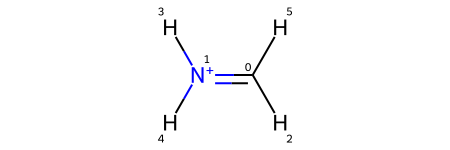

In [7]:
frames.st.default_mol(atomNote=True)

In [8]:
# Pyramidalizations at hops from S2 -> S1
pyr = frames.st.hops([(3, 2)]).atXYZ.st.get_pyramids()
pyr.descriptor_tex

<xarray.DataArray 'descriptor_tex' (descriptor: 2)> Size: 144B
array(['$\\chi_{0,1}^{2,5}$', '$\\chi_{1,0}^{3,4}$'], dtype='<U18')
Coordinates: (3)
Dimensions without coordinates: descriptor

We want the pyramidalization angle $\chi_{1,0}^{3,4}$:

In [9]:
pyr1 = pyr.sel(descriptor_tex='$\\chi_{1,0}^{3,4}$')
pyr1

<xarray.DataArray 'atXYZ' (frame: 90)> Size: 360B
array([-0.18366182, -0.32356262,  0.04043615, -0.76236904,  1.1451764 ,
        0.10982001, -0.7846948 ,  0.9760359 , -0.5564121 , -0.34665   ,
       -0.8359319 , -1.2224747 , -1.0998787 ,  1.1950725 ,  0.41481948,
        0.13234699,  0.2983688 ,  1.1742662 , -0.31953967,  1.0695616 ,
       -0.02418697, -1.2135719 , -0.13515198,  0.5811397 ,  0.20981395,
        0.66447407, -1.2477828 ,  0.18198037,  0.40057766,  0.01034594,
       -0.2862624 ,  1.2651784 ,  0.18374884,  0.84085715, -0.49058592,
        0.36634016, -0.2136879 ,  1.3219099 , -0.59104455, -0.88969696,
       -0.87979853, -0.1756934 ,  1.1355934 ,  0.1485771 , -1.3808676 ,
       -1.3398827 ,  0.01076019, -0.02926183,  0.19771886, -0.5181433 ,
       -0.8668817 ,  0.09342158,  1.0590713 ,  0.35503292, -0.03172755,
       -1.003537  ,  0.15494919, -1.0805773 , -0.02139246,  0.46014416,
       -0.14320982, -0.80446684, -1.1349026 , -0.4504856 , -0.05108356,
        0.31873   , -0.7808596 ,  1.1855426 , -0.08720136, -0.22273386,
        0.54555273, -0.1353389 ,  0.1699872 ,  1.2399449 , -0.41970742,
        0.3575325 , -0.14643371, -1.0278791 ,  0.08129644,  0.0232054 ,
       -0.79350865,  0.34085715, -0.2271651 ,  1.4551536 ,  0.51659405,
       -0.05929041,  0.33284974,  1.1285129 , -0.09403455,  0.30657172],
      dtype=float32)
Coordinates: (9)

In [15]:
# Dihedrals at hops S1 -> S0
dih = frames.st.hops([(2, 1)]).atXYZ.st.get_bond_torsions(ang='rad', signed=True)
dih

<xarray.DataArray 'atXYZ' (descriptor: 4, frame: 76)> Size: 1kB
array([[-1.3884217e+00, -1.6249864e+00, -8.8353318e-01,  5.7622808e-01,
         1.8805877e+00, -1.3026330e+00,  1.2174776e+00,  5.2613121e-01,
        -1.3857783e+00, -2.2608871e+00, -5.4672539e-01,  1.2016392e+00,
        -4.0491763e-01, -7.6015532e-01, -6.5575320e-01, -1.2354887e+00,
         1.6566520e+00,  2.5720539e+00,  5.0840718e-01, -4.7901362e-01,
        -8.0312765e-01,  2.0583889e+00,  2.4304922e-01, -1.7709709e+00,
         2.5597272e+00,  1.9115161e+00, -1.1078072e+00,  1.9469570e+00,
         7.0064664e-01,  9.6335483e-01, -1.3704726e-01, -1.6200087e+00,
        -2.4500723e+00,  2.8019634e-01, -9.7867644e-01,  2.8018022e+00,
        -1.5515617e+00, -2.1521082e+00,  1.7801181e+00, -1.6167339e+00,
        -8.1838894e-01, -1.8628378e+00, -1.9091878e+00,  2.2332618e+00,
        -2.0258725e+00, -1.0658319e+00,  1.7336622e+00, -9.0711403e-01,
         2.0007658e+00, -1.1120933e+00, -7.3914266e-01, -1.4964455e+00,
        -2.5671509e-01, -2.8748984e+00, -1.8339021e+00,  2.7193110e+00,
        -1.3979270e+00,  2.6537542e+00,  2.0841999e+00,  1.9562367e-01,
        -1.1779573e+00, -3.2545385e-01, -3.0497265e+00,  1.9173721e+00,
         1.4619491e+00,  7.2651392e-01,  3.0493472e+00,  1.5433042e+00,
        -5.3644913e-01,  3.6756385e-02,  1.8407623e+00,  1.2212636e+00,
        -1.0137075e+00,  1.1327113e+00,  2.1215885e+00, -1.3269103e+00],
       [ 1.9437115e+00,  1.4560652e+00,  7.4551159e-01,  1.9928348e+00,
...
       [ 2.8536029e+00, -1.7179589e+00, -1.3359756e+00,  3.2007611e-01,
         5.3096622e-01, -1.4080917e+00,  5.8896917e-01, -3.1501698e-01,
        -3.0977471e+00, -1.1205081e+00,  1.3842876e+00,  1.4093486e+00,
        -6.5820509e-01, -2.6018643e-01, -2.5444572e+00,  1.2288659e-01,
        -1.1822463e+00, -6.4971370e-01, -1.1536084e+00, -2.5198755e+00,
        -2.5624660e-01,  1.3162394e+00,  1.3027761e+00,  1.7782573e+00,
         9.7606677e-01,  1.4561068e+00, -8.6001837e-01,  1.2742137e+00,
         2.6758149e+00,  2.2968597e+00, -1.6654667e+00, -1.2413353e+00,
         1.0664036e+00,  2.7688549e+00, -2.0955920e+00,  1.4140943e+00,
        -1.9243947e+00,  2.7175212e+00,  1.3230225e+00,  1.7774000e+00,
        -2.8626087e+00, -1.3432535e+00, -1.3875849e+00,  1.0732009e+00,
        -1.6221989e+00, -1.2522687e+00, -1.5979960e+00, -2.4457936e+00,
         1.0582232e+00, -2.2607927e+00,  2.1635284e+00, -1.4927447e+00,
        -1.2534466e+00,  6.4167041e-01, -1.7942294e+00,  6.7726171e-01,
        -1.6963704e+00,  2.8779154e+00,  8.8598534e-02, -2.0788145e+00,
        -1.8981147e+00, -8.8893101e-02, -1.2256026e+00,  1.6037939e+00,
         1.5628525e+00,  2.8878050e+00,  7.3211145e-01,  3.5846463e-01,
         1.7809032e-01, -6.4815301e-01, -1.9508588e+00,  1.7156224e+00,
        -1.6028020e+00,  2.2323112e+00, -9.3978465e-01, -1.7504497e+00]],
      dtype=float32)
Coordinates: (16)
Dimensions without coordinates: descriptor
Attributes: (6)

Text(0.5, 0.01, 'angle / °')

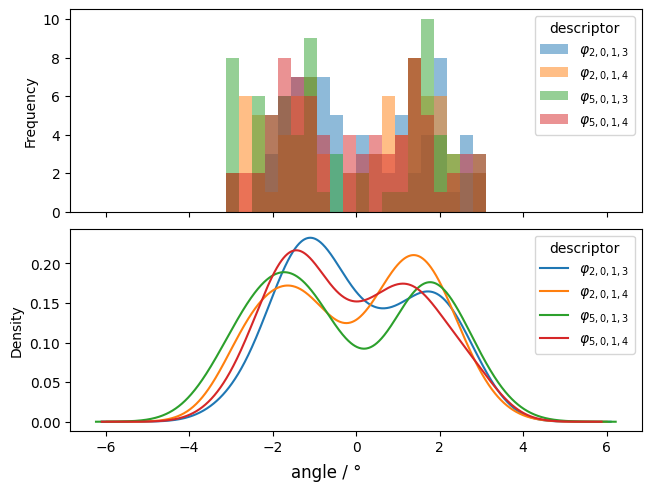

In [16]:
import matplotlib.pyplot as plt

df = dih.swap_dims(descriptor='descriptor_tex').rename(descriptor_tex='descriptor')\
        .transpose(..., 'descriptor').to_pandas()

fig, axs = plt.subplots(2, 1, sharex=True, layout='constrained')
df.plot.hist(alpha=.5, ax=axs[0], bins=20)
df.plot.kde(ax=axs[1])
fig.supxlabel('angle / °')
# export CSV

# .plot.hist(color='descriptor')

## Try to fit distributions for export
Tried so far: vonmises
Yet to try: gaussian_kde of cos & sin 

In [21]:
from scipy.stats import gaussian_kde
gaussian_kde(df.T).evaluate(np.linspace(-np.pi, np.pi))

ValueError: points have dimension 1, dataset has dimension 4

In [22]:
from scipy.stats import vonmises
fit0 = vonmises.fit(df.iloc[:, 0])
fit1 = vonmises.fit(df.iloc[:, 1])
def vonmises(): ... # TODO

(0.0, 0.21930266792582762)

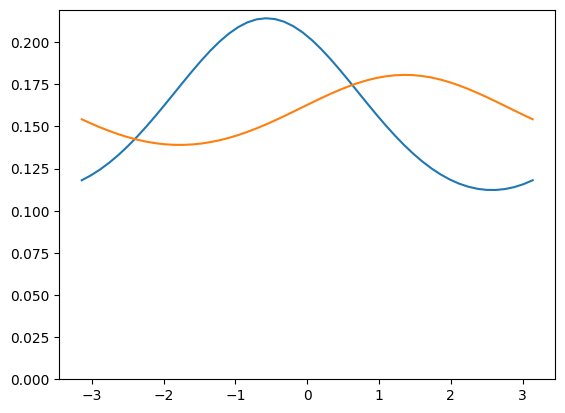

In [18]:
import numpy as np
theta = np.linspace(-np.pi, np.pi)
res0 = vonmises.pdf(theta, *fit0)
res1 = vonmises.pdf(theta, *fit1)
plt.plot(theta, res0)
plt.plot(theta, res1)
_, top = plt.ylim()
plt.ylim(0, top)

<PolarAxes: ylabel='Frequency'>

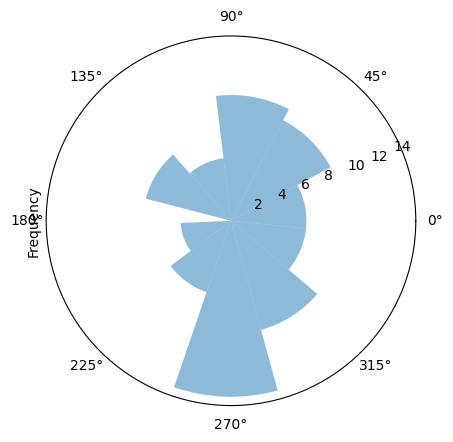

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})
df.iloc[:, 1].plot.hist(alpha=.5, ax=ax, bins=10)
# ax.plot(theta, res0*10)
# ax.plot(theta, res1*10)

## Investigate effect of including points around hops

In [30]:
dih_hop_windows = (
    frames.st.focus_hops([(2, 1)], window=slice(-2, 2))
    .atXYZ
    # .rename(hop_time='frame')
    .assign_attrs(mol=frames.st.default_mol())
    .st.get_bond_torsions(ang='rad', signed=True, 
        matches_or_mol=frames.st.default_mol())
)
dih_hop_windows

/git/shnitsel-tools/shnitsel/analyze/hops.py:147: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  res = xr.concat(to_cat, 'hop', join='outer')
/git/shnitsel-tools/shnitsel/analyze/hops.py:147: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  res = xr.concat(to_cat, 'hop', join='outer')


<xarray.DataArray 'atXYZ' (hop: 76, descriptor: 4, hop_time: 9)> Size: 11kB
array([[[-1.3861307 , -1.3828744 , -1.3811425 , ..., -1.4238015 ,
         -1.4441143 , -1.4685243 ],
        [ 2.1936574 ,  2.1405463 ,  2.082224  , ...,  1.7666254 ,
          1.67356   ,  1.5771917 ],
        [-0.46359178, -0.47950312, -0.4880329 , ..., -0.42433304,
         -0.3825305 , -0.32853135],
        [ 3.1161966 ,  3.0439177 ,  2.9753332 , ...,  2.766094  ,
          2.7351437 ,  2.7171845 ]],

       [[-1.9657459 , -1.9057841 , -1.8300253 , ..., -1.3369914 ,
         -1.2220705 , -1.1253457 ],
        [ 1.2137225 ,  1.2652392 ,  1.3222113 , ...,  1.6476963 ,
          1.732597  ,  1.8046287 ],
        [ 0.9834893 ,  1.0843759 ,  1.2002945 , ...,  1.8456616 ,
          1.9978075 ,  2.1318846 ],
        [-2.1202278 , -2.027786  , -1.9306543 , ..., -1.4528359 ,
         -1.3307104 , -1.221326  ]],

       [[-0.5558432 , -0.612342  , -0.6889934 , ..., -1.0304512 ,
         -1.0808369 , -1.1127713 ],
...
        [ 2.578144  ,  2.5216415 ,  2.445836  , ...,  1.9124569 ,
          1.7321084 ,  1.5465944 ]],

       [[ 1.9266255 ,  1.9723345 ,  2.0207925 , ...,  2.2335439 ,
          2.2858148 ,  2.3375854 ],
        [-2.1504378 , -2.1190038 , -2.0811377 , ..., -1.8289331 ,
         -1.7335957 , -1.6260571 ],
        [ 2.9589179 ,  3.0123303 ,  3.0650618 , ..., -3.0403833 ,
         -3.0083337 , -2.9811065 ],
        [-1.1181455 , -1.0790068 , -1.0368687 , ..., -0.8196748 ,
         -0.7445583 , -0.6615638 ]],

       [[-1.560065  , -1.5102851 , -1.4547673 , ..., -1.1434487 ,
         -1.0401902 , -0.9266968 ],
        [ 1.6507816 ,  1.6602565 ,  1.6752748 , ...,  2.1581926 ,
          2.709774  , -2.9243042 ],
        [ 1.1465288 ,  1.2098653 ,  1.2839584 , ...,  1.6719106 ,
          1.7842045 ,  1.8988093 ],
        [-1.9258099 , -1.9027784 , -1.8691846 , ..., -1.3096333 ,
         -0.7490167 , -0.0987974 ]]], shape=(76, 4, 9), dtype=float32)
Coordinates: (17)
Dimensions without coordinates: hop, descriptor
Attributes: (6)

<PolarAxes: ylabel='Frequency'>

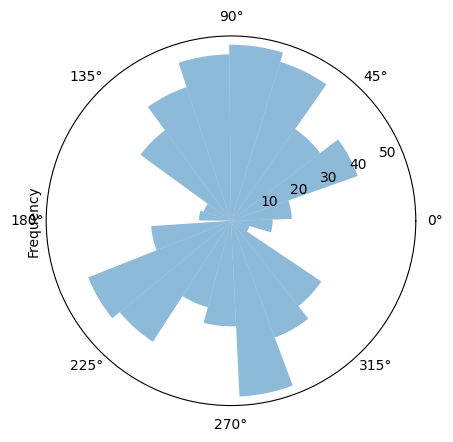

In [32]:
df = dih_hop_windows.stack(frame=['hop', 'hop_time']).swap_dims(descriptor='descriptor_tex').rename(descriptor_tex='descriptor')\
        .transpose(..., 'descriptor').to_pandas()

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})
df.iloc[:, 1].plot.hist(alpha=.5, ax=ax, bins=20)